In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data on orbit
mu = 3.986004418e14
a = 6371e3 + 700e3
period = 2 * np.pi * np.sqrt(a**3/mu)
n = 2 * np.pi / period

In [2]:
class Simulation:
    
    def __init__(self, state_history, state_history_m = False, control_torque = False):
        
        self.state_history = state_history 
        
        if type(state_history_m) != type(False):
            self.state_history_m = state_history_m
            
        if type(control_torque) != type(False):
            self.control_torque = control_torque
            
state_history = np.loadtxt('output/Q3/state_history.dat')
control_torque = np.loadtxt('output/Q3/control_torque.dat')
measurements = np.loadtxt('output/Q3/measurements.dat')
S = Simulation(state_history, control_torque = control_torque)


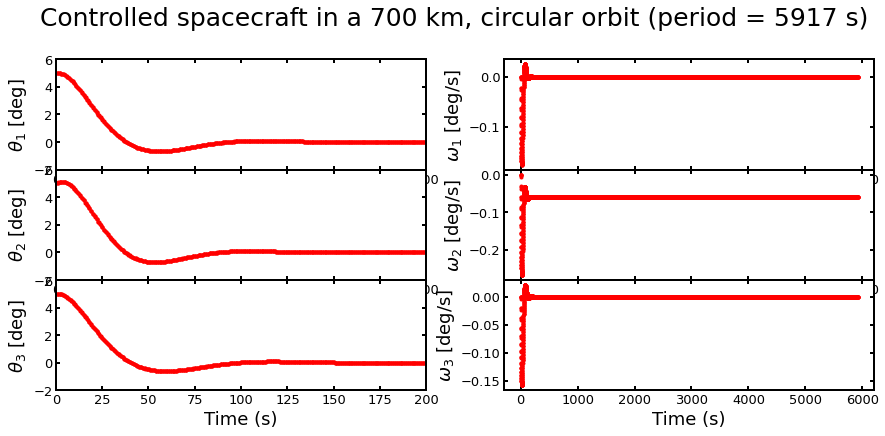

In [4]:
labels = [r"$\theta_1$ [deg]", r"$\theta_2$ [deg]", r"$\theta_3$ [deg]",
          "$\omega_1$ [deg/s]", "$\omega_2$ [deg/s]", "$\omega_3$ [deg/s]"]

fig, axes = plt.subplots(3, 2, figsize = (13, 6))
fig.tight_layout(pad=4)
fig.suptitle("Controlled spacecraft in a 700 km, circular orbit (period = %.i s)" % period, fontsize = 25, y = 1.02)
fig.subplots_adjust(hspace=0)
axes[2, 0].set_xlabel("Time (s)", fontsize = 18)
axes[2, 1].set_xlabel("Time (s)", fontsize = 18)

for ax in axes[:,0]:
    ax.set_xlim(0, 200)
    ax.set_ylim(-2, 6)

#     ax.set_xlim(0, 500)
#     ax.set_ylim(-0.1, 0.1)

for i, ax in enumerate(axes.T.flat): 
    
    ax.plot(S.state_history[:,0], np.rad2deg(S.state_history[:,1+i]), 'ro', markersize = 3)
    ax.set_ylabel(labels[i], fontsize = 18) 
    #ax.axvline(81)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize=13)
    ax.tick_params(axis="both",direction="in",which="both", length=4, width = 2)
    ax.tick_params(bottom=True, top=True, left=True, right=True)

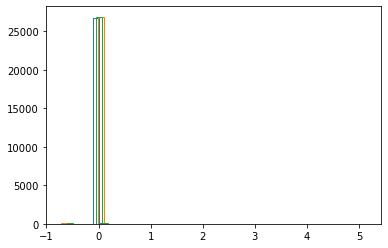

In [66]:
for i in range(3):
    
    plt.hist(np.rad2deg(S.state_history[:,i+1]), bins = 50, histtype = 'step')